# Testing DRFL algorithm

The purpose of this paper consists on testing about how is working the implemented algorithm.

This algorithm works with time series, taking as input a pd.Series data


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from main import DRFL
import random
import matplotlib.cm as cm


# Creating Time Series with two target routines

Let's create a time series for detecting two target routines. Each routine will have a noise parameter (to give more realism) 



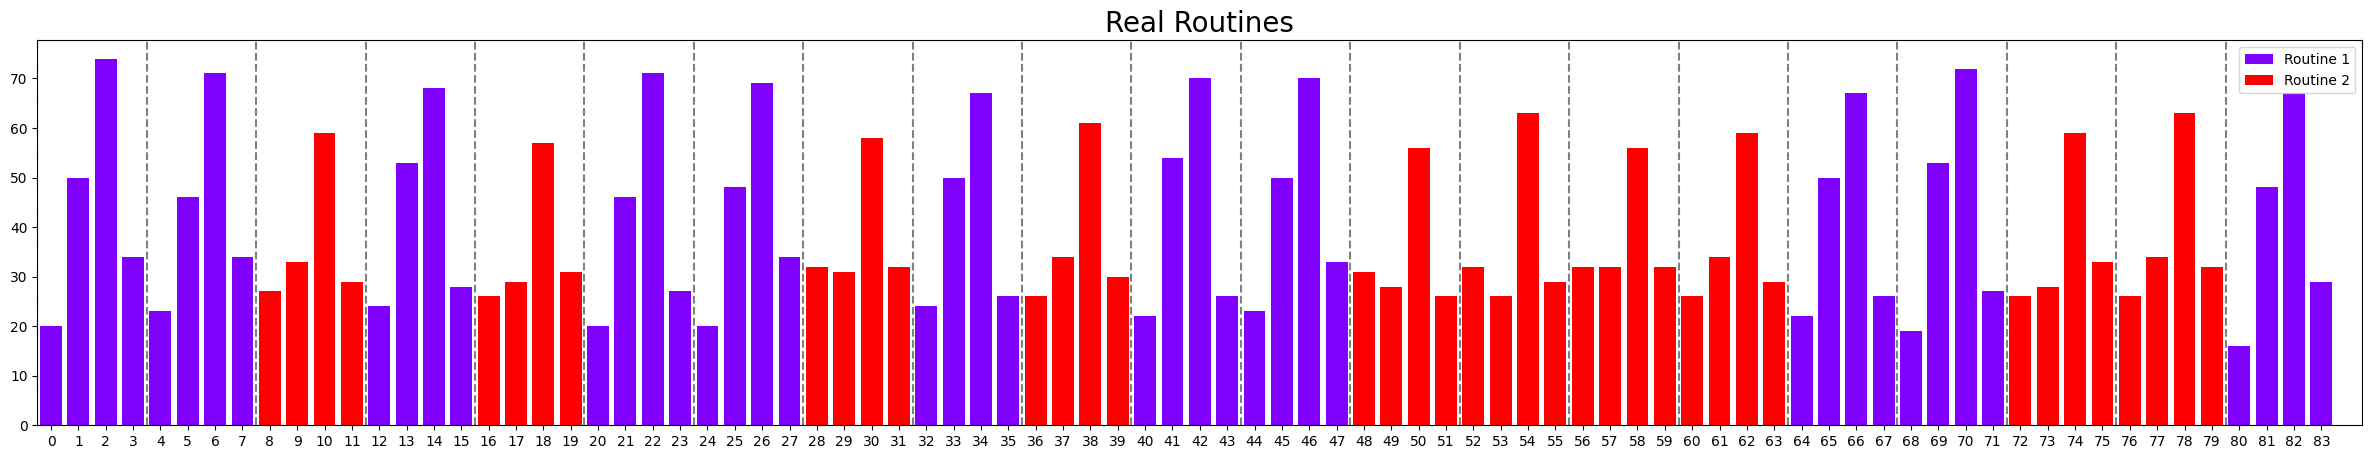

In [2]:
# PARAMS
target_routine_1 = [20, 50, 70, 30]
target_routine_2 = [30, 30, 60, 30]
noise_threshold_minutes = 4
T_max = 21
idx_routine1 = [0,1,3,5,6,8,10,11,16,17,20]

def randomized_routine(routine, noise_threshold):
    return [random.randint(x-noise_threshold, x+noise_threshold) for x in routine]

def get_colors(idx_routine):
    base_colors = cm.rainbow(np.linspace(0, 1, 2))
    colores = []
    for x in range(T_max):
        if x in idx_routine:
            for y in range(len(target_routine_1)):
                colores.append(base_colors[0])
        else:
            for y in range(len(target_routine_1)):
                colores.append(base_colors[1])
    return colores


def plot_groundtruth(time_series):
    ts = np.array(time_series)
    # Plotting the bar chart with vertical lines every 4 bars
    plt.figure(figsize=(30,5))
    bars = plt.bar(x=[x for x in range(len(ts))], height=ts, color=get_colors(idx_routine1))

    # Draw a vertical line every four bars
    for i in range(0, len(ts), len(target_routine_1)):
        plt.axvline(x=i-0.5, color='grey', linestyle='--')
    plt.xticks(ticks=[x for x in range(len(ts))], labels=[x for x in range(len(ts))])
    # add_legend
    plt.legend([bars[0], bars[10]], ['Routine 1', 'Routine 2'])
    plt.title("Real Routines", fontsize=20)
    plt.xlim((-0.5, len(ts)+0.5))
    plt.show()



time_series = []
for x in range(T_max):
    if x in idx_routine1:
        random_1 = randomized_routine(target_routine_1, noise_threshold_minutes)
        for y in random_1:
            time_series.append(y)
    else:
        random_2 = randomized_routine(target_routine_2, noise_threshold_minutes)
        for y in random_2:
            time_series.append(y)
            
plot_groundtruth(time_series)

Reds owns to the routine target 1, and blues owns to routine target 2

In [3]:
time_series = pd.Series(time_series)
time_series.index = pd.date_range(start="2024-01-01", periods=len(time_series))

# Testing DRFL with OVERLAP (epsilon = 1)

Now that we have synthetised data, lets detect the routines with DRFL algorithm:

We'll use as fixed param: 
m = 4


In [4]:
routine_detector = DRFL(m=4, R=10, C=5, G=50, epsilon=1)
routine_detector.fit(time_series)
routine_detector.show_results()

Routines detected:  7
__________________________________________________
Centroid 1: [21.18181818 49.81818182 69.63636364 29.45454545]
Routine 1: [array([20, 50, 74, 34], dtype=int64), array([23, 46, 71, 34], dtype=int64), array([24, 53, 68, 28], dtype=int64), array([20, 46, 71, 27], dtype=int64), array([20, 48, 69, 34], dtype=int64), array([24, 50, 67, 26], dtype=int64), array([22, 54, 70, 26], dtype=int64), array([23, 50, 70, 33], dtype=int64), array([22, 50, 67, 26], dtype=int64), array([19, 53, 72, 27], dtype=int64), array([16, 48, 67, 29], dtype=int64)]
Date 1: [Timestamp('2024-01-01 00:00:00', freq='D'), Timestamp('2024-01-05 00:00:00', freq='D'), Timestamp('2024-01-13 00:00:00', freq='D'), Timestamp('2024-01-21 00:00:00', freq='D'), Timestamp('2024-01-25 00:00:00', freq='D'), Timestamp('2024-02-02 00:00:00', freq='D'), Timestamp('2024-02-10 00:00:00', freq='D'), Timestamp('2024-02-14 00:00:00', freq='D'), Timestamp('2024-03-05 00:00:00', freq='D'), Timestamp('2024-03-09 00:00:00

In [5]:
print(len(time_series))

84


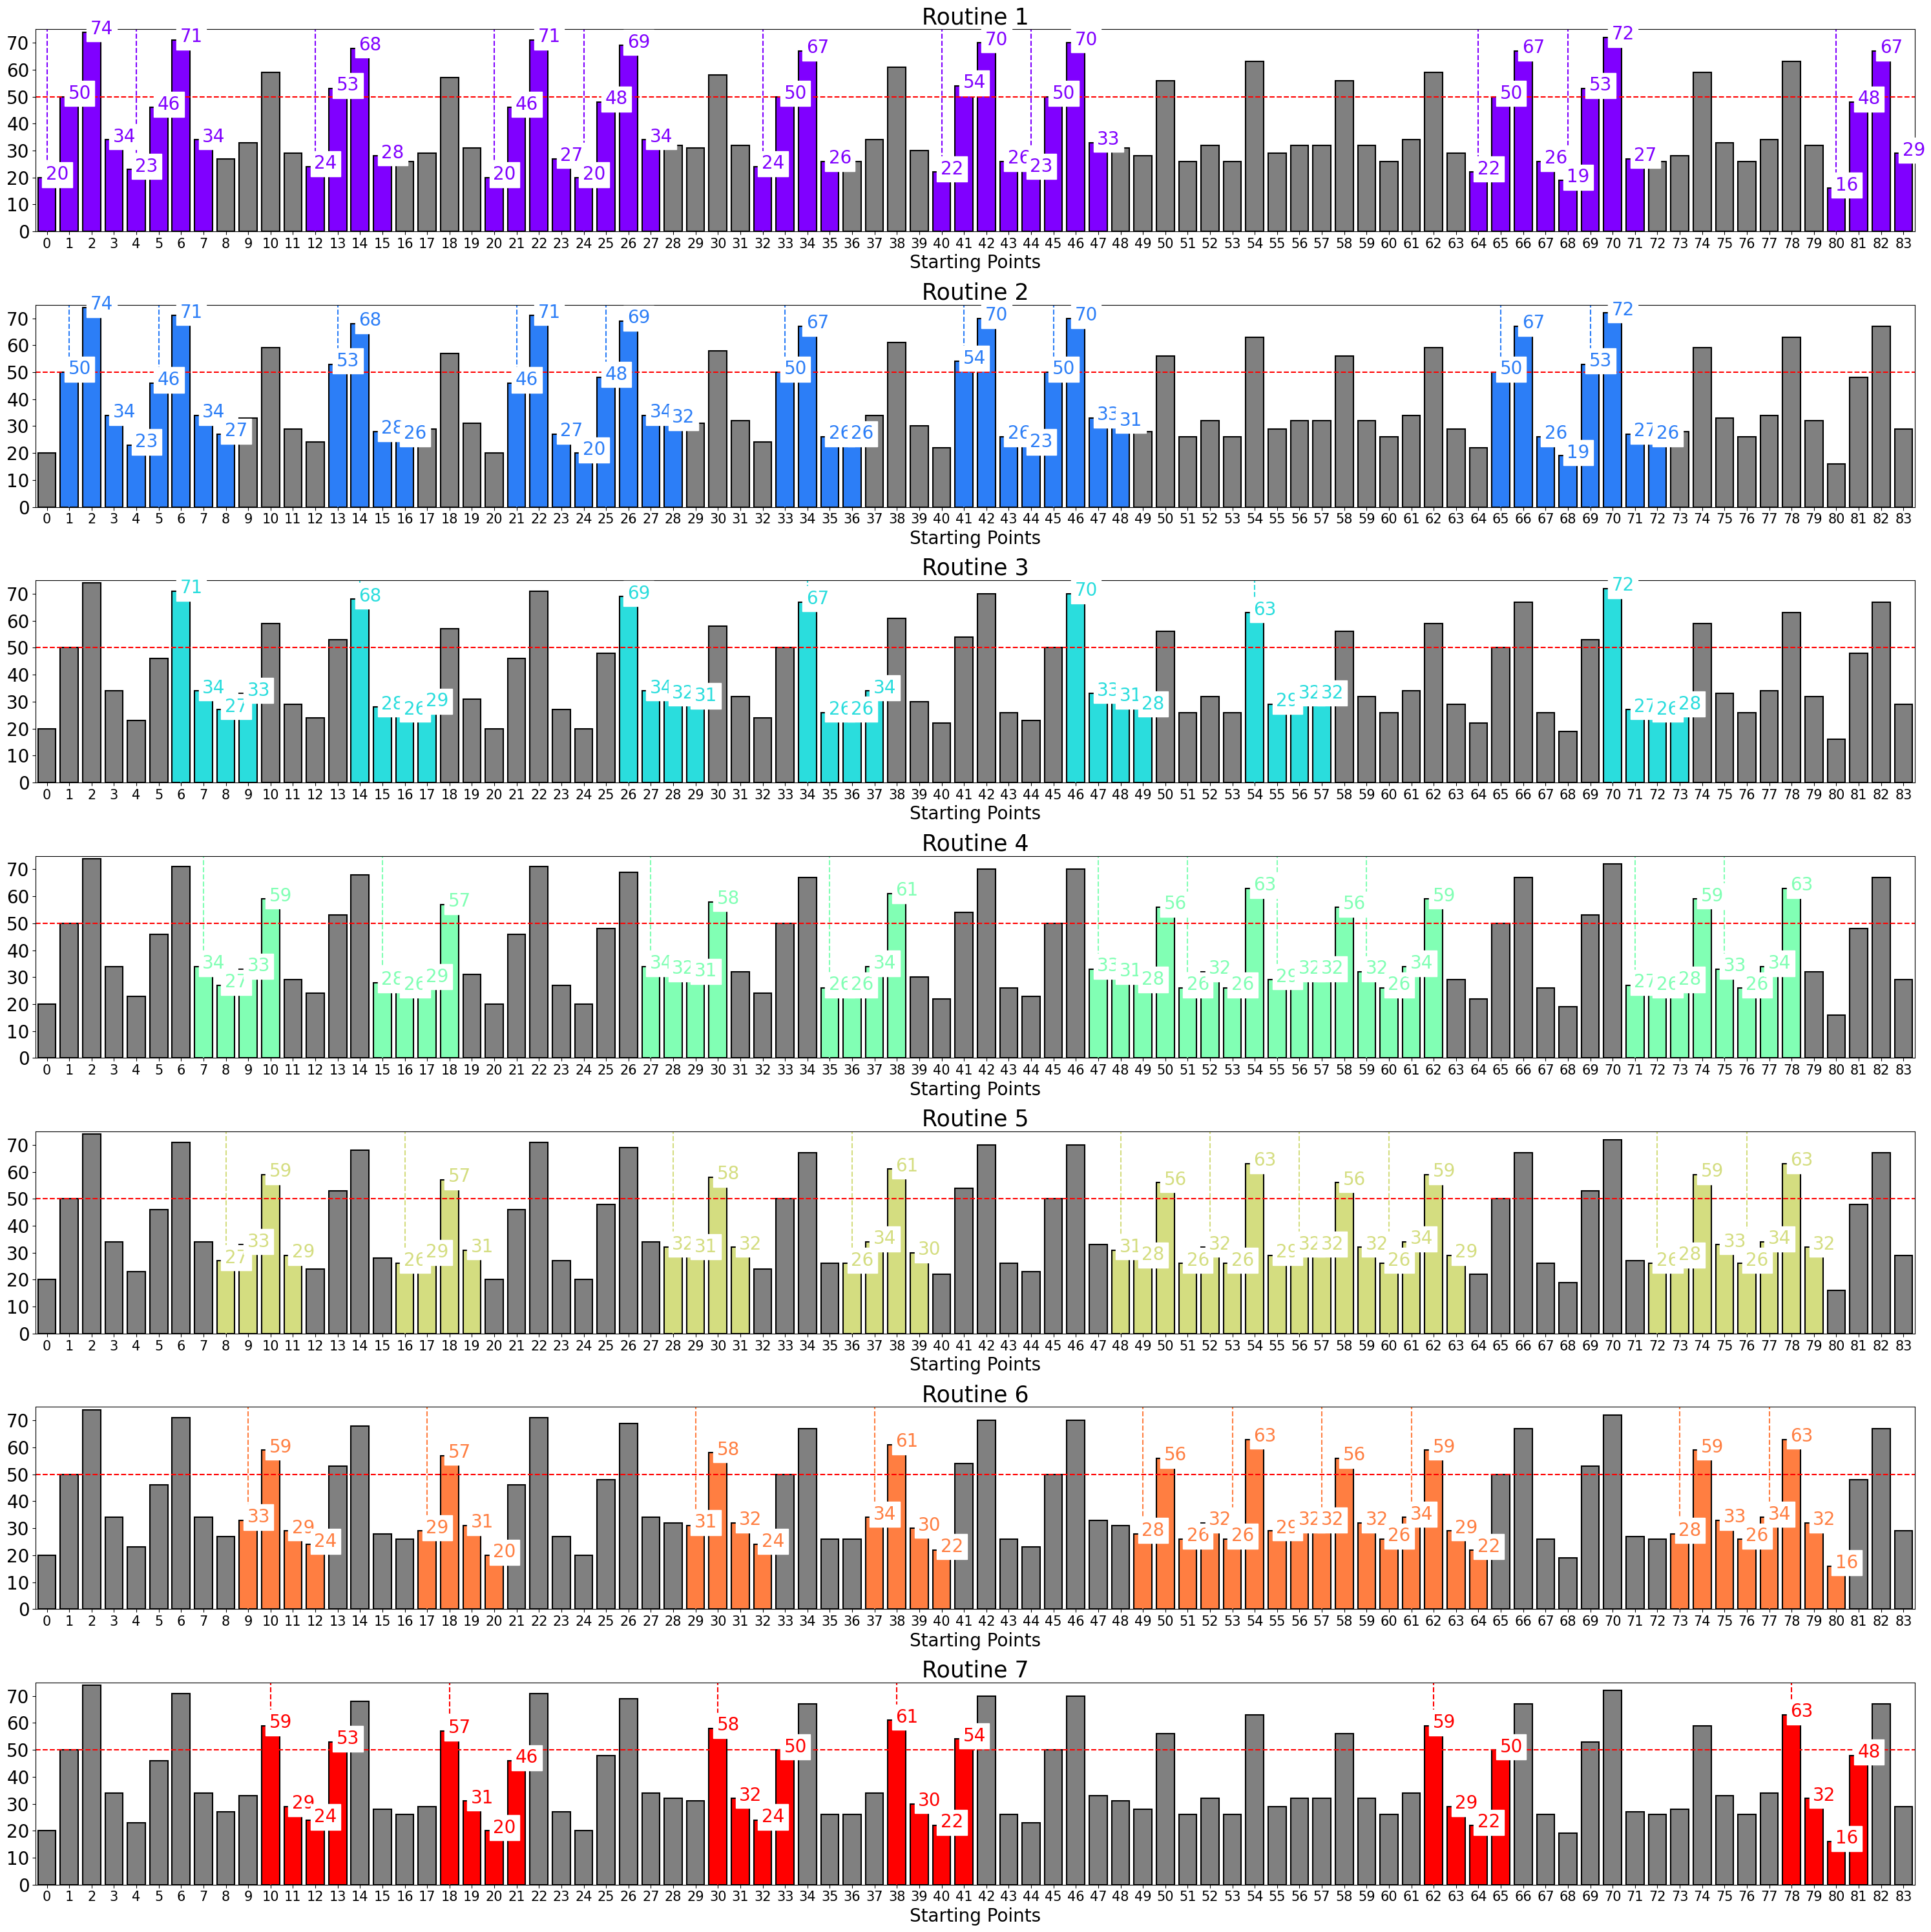

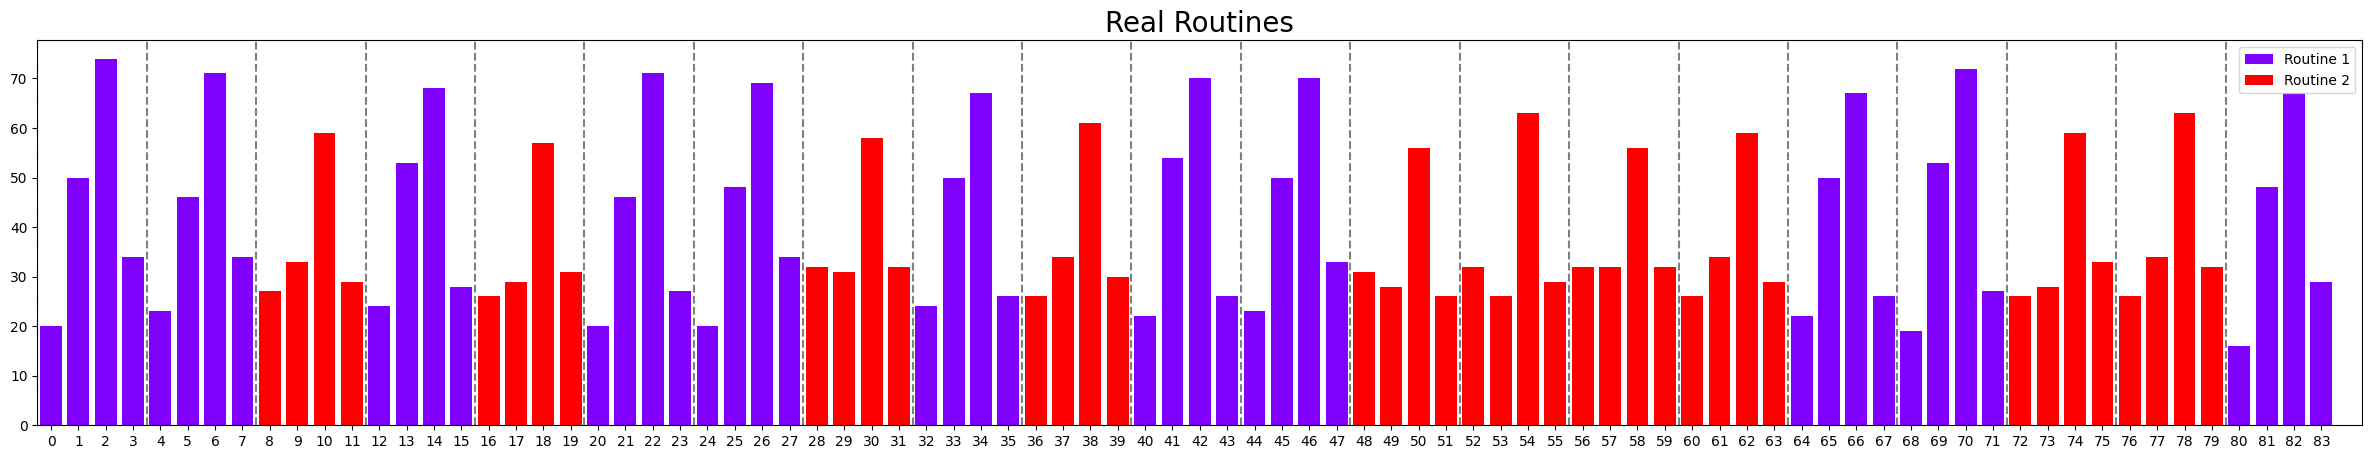

In [6]:
routine_detector.plot_results(
    figsize=(30, 30),
    title_fontsize=25,
    xticks_fontsize=15
)

plot_groundtruth(time_series)



# Testing DRFL with less Overlap (epsilon=0.5)

We see overlapping, so let's reduce the epsilon param to 0.5

In [7]:
routine_detector = DRFL(m=4, R=5, C=5, G=50, epsilon=0.5)
routine_detector.fit(time_series)
routine_detector.show_results()
routines_detected = routine_detector.get_results()

Routines detected:  2
__________________________________________________
Centroid 1: [27.5   30.75  59.625 29.875]
Routine 1: [array([27, 33, 59, 29], dtype=int64), array([26, 29, 57, 31], dtype=int64), array([26, 34, 61, 30], dtype=int64), array([31, 28, 56, 26], dtype=int64), array([32, 26, 63, 29], dtype=int64), array([26, 34, 59, 29], dtype=int64), array([26, 28, 59, 33], dtype=int64), array([26, 34, 63, 32], dtype=int64)]
Date 1: [Timestamp('2024-01-09 00:00:00', freq='D'), Timestamp('2024-01-17 00:00:00', freq='D'), Timestamp('2024-02-06 00:00:00', freq='D'), Timestamp('2024-02-18 00:00:00', freq='D'), Timestamp('2024-02-22 00:00:00', freq='D'), Timestamp('2024-03-01 00:00:00', freq='D'), Timestamp('2024-03-13 00:00:00', freq='D'), Timestamp('2024-03-17 00:00:00', freq='D')]
Starting Points 1:  [8, 16, 36, 48, 52, 60, 72, 76]

 -------------------------------------------------- 

Centroid 2: [27.83333333 21.66666667 51.33333333 69.33333333]
Routine 2: [array([29, 24, 53, 68], dty

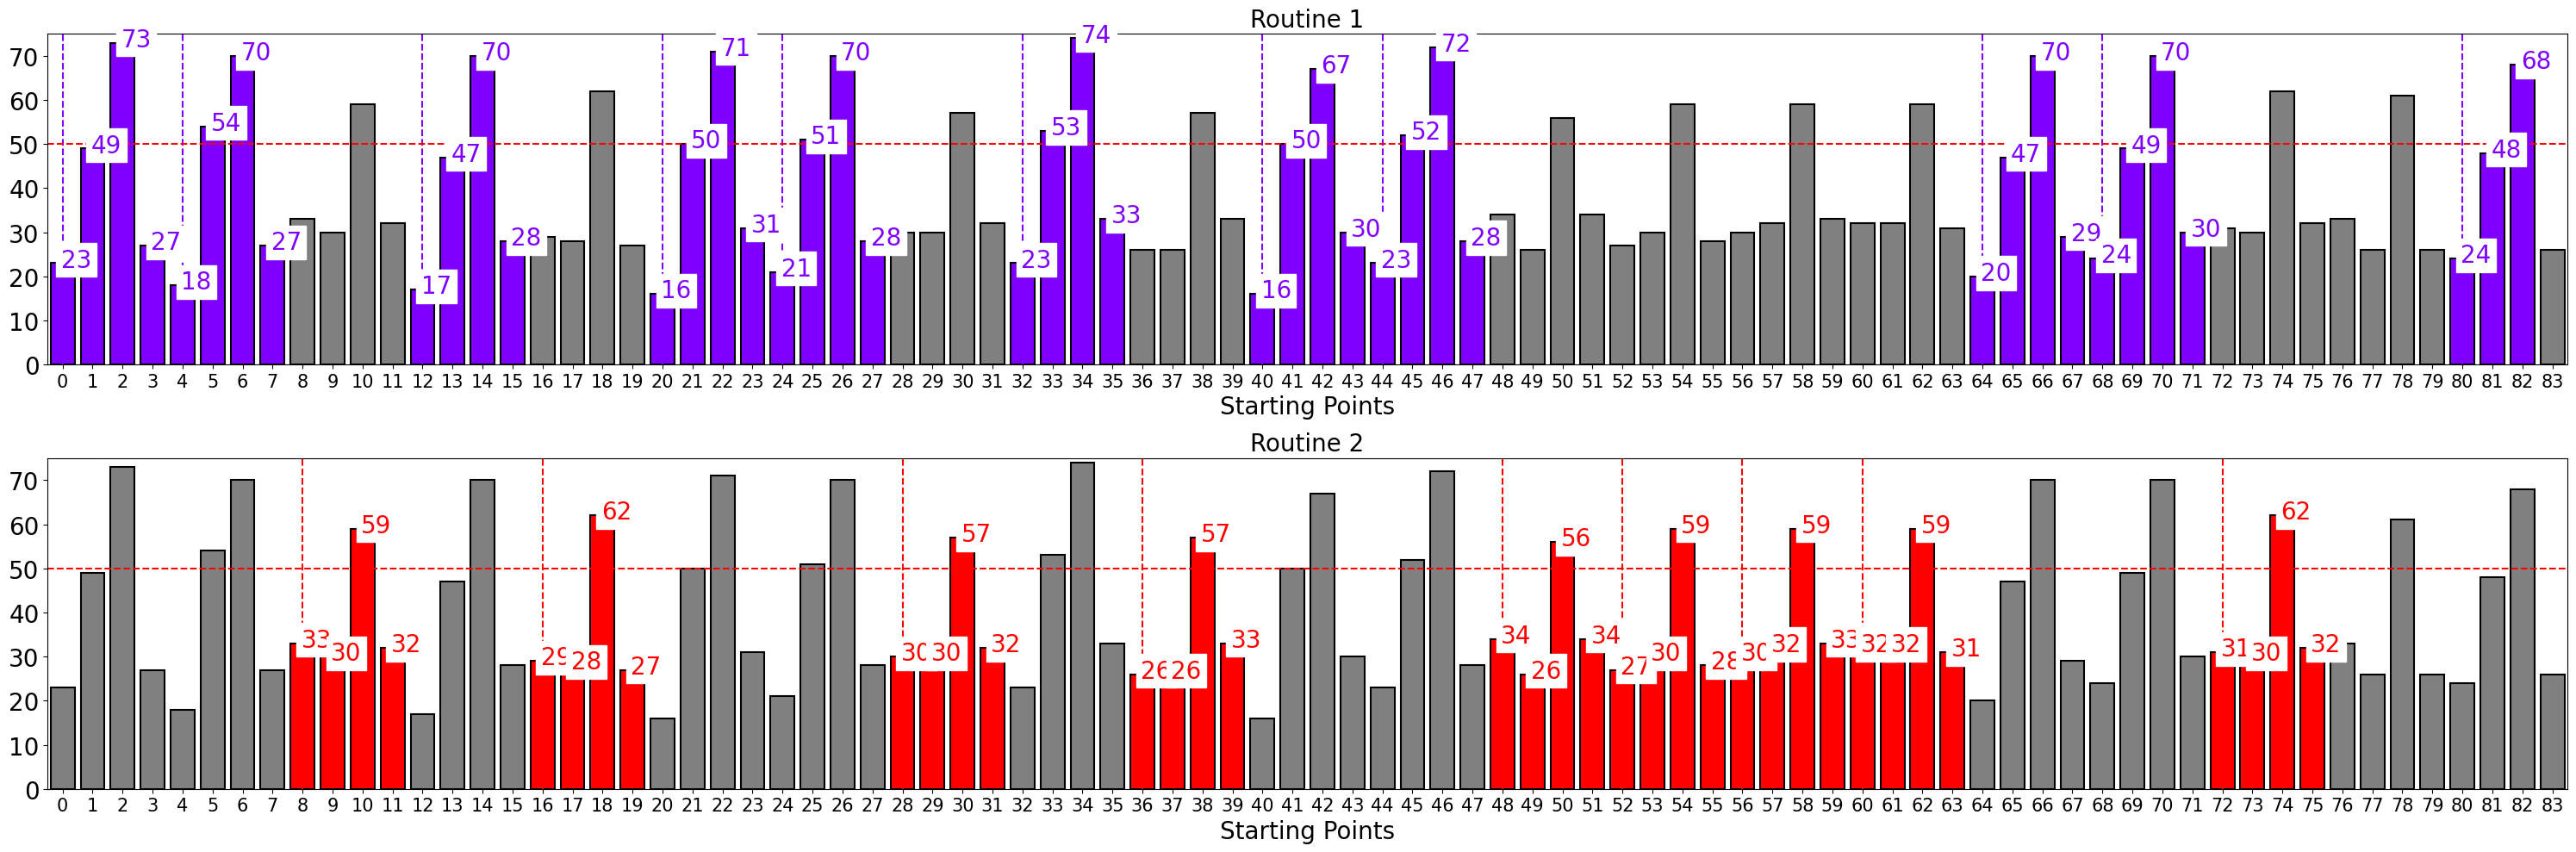

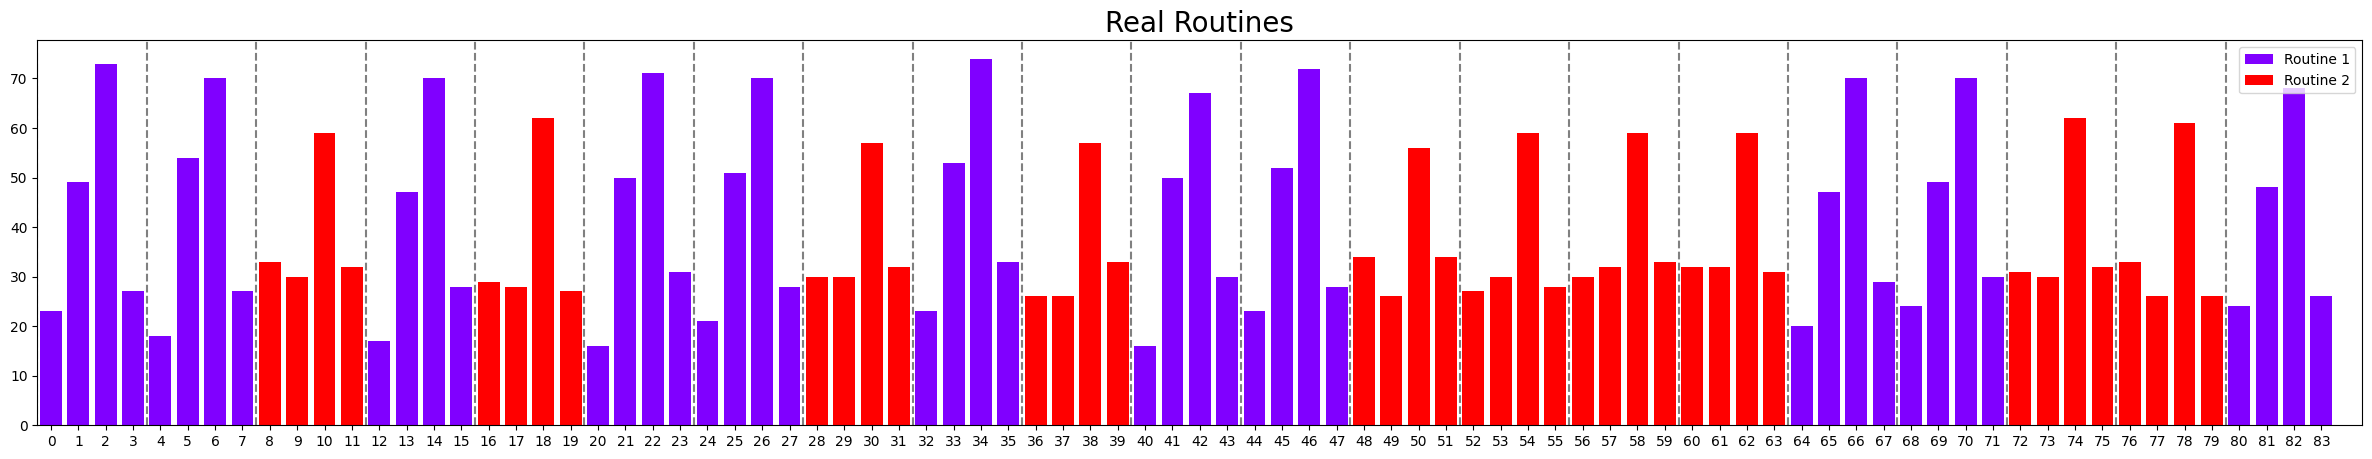

In [7]:
routine_detector.plot_results(
    figsize=(30, 10),
    title_fontsize=20, 
    xticks_fontsize=15
)

plot_groundtruth(time_series)

In [64]:
time_series = pd.Series([1, 3, 6, 4, 2, 1, 2, 3, 6, 4, 1, 1, 3, 6, 4, 1])
time_series.index = pd.date_range(start="2024-01-01", periods=len(time_series))


def plot_groundtruth(time_series, start_points, m, G=4, save_dir=None,
                     figsize=(30, 10), xticks_fontsize=20,
                     labels_fontsize=20):
    base_colors = cm.rainbow(np.linspace(0, 1, len(start_points)))
    ts = np.array(time_series)
    plt.figure(figsize=figsize)
    N_rows = len(start_points)
    maximum = max(time_series)
    for row, routine in enumerate(start_points):
        all_colors = ["gray"] * len(time_series)
        plt.subplot(N_rows, 1, row + 1)
        plt.title(f"Target Routine {row + 1}", fontsize=20)
        for start_point in routine:
            plt.axvline(x=start_point, color=base_colors[row], linestyle='--')
            for j in range(m):
                plt.text(start_point + j - 0.05, time_series[start_point + j] - 0.8,
                         f"{time_series[start_point + j]}",
                         fontsize=labels_fontsize, color=base_colors[row], backgroundcolor="white")
                all_colors[start_point + j] = base_colors[row]
        plt.bar(x=[x for x in range(len(ts))], height=ts, color=all_colors)
        plt.axhline(y=G, color='red', linestyle=':')
        plt.xticks(ticks=[x for x in range(len(ts))], labels=[x for x in range(len(ts))],
                   fontsize=xticks_fontsize)
        plt.xlim((-0.5, len(ts)-0.5))
        plt.ylim((0, maximum + 1))
        plt.tight_layout()

    if save_dir:
        plt.savefig(save_dir)

    plt.show()


target_start_points = [[0, 6, 11], [1, 7, 12], [2, 8, 13]]
time_series = pd.Series([1, 3, 6, 4, 2, 1, 2, 3, 6, 4, 1, 1, 3, 6, 4, 1])
time_series.index = pd.date_range(start="2024-01-01", periods=len(time_series))

# Case 1 time series

## Epsilon = 1

In [9]:
# ----------------WITH OVERLAPPING EPSILON=1--------------------
routines = DRFL(m=3, G=4, R=2, C=3, epsilon=1)
routines.fit(time_series)
routines.show_results()

Routines detected:  3
__________________________________________________
Centroid 1: [1.33333333 3.         6.        ]
Routine 1: [array([1, 3, 6], dtype=int64), array([2, 3, 6], dtype=int64), array([1, 3, 6], dtype=int64)]
Date 1: [Timestamp('2024-01-01 00:00:00', freq='D'), Timestamp('2024-01-07 00:00:00', freq='D'), Timestamp('2024-01-12 00:00:00', freq='D')]
Starting Points 1:  [0, 6, 11]

 -------------------------------------------------- 

Centroid 2: [3. 6. 4.]
Routine 2: [array([3, 6, 4], dtype=int64), array([3, 6, 4], dtype=int64), array([3, 6, 4], dtype=int64)]
Date 2: [Timestamp('2024-01-02 00:00:00', freq='D'), Timestamp('2024-01-08 00:00:00', freq='D'), Timestamp('2024-01-13 00:00:00', freq='D')]
Starting Points 2:  [1, 7, 12]

 -------------------------------------------------- 

Centroid 3: [5.5  3.5  1.25]
Routine 3: [array([6, 4, 2], dtype=int64), array([4, 2, 1], dtype=int64), array([6, 4, 1], dtype=int64), array([6, 4, 1], dtype=int64)]
Date 3: [Timestamp('2024-01-

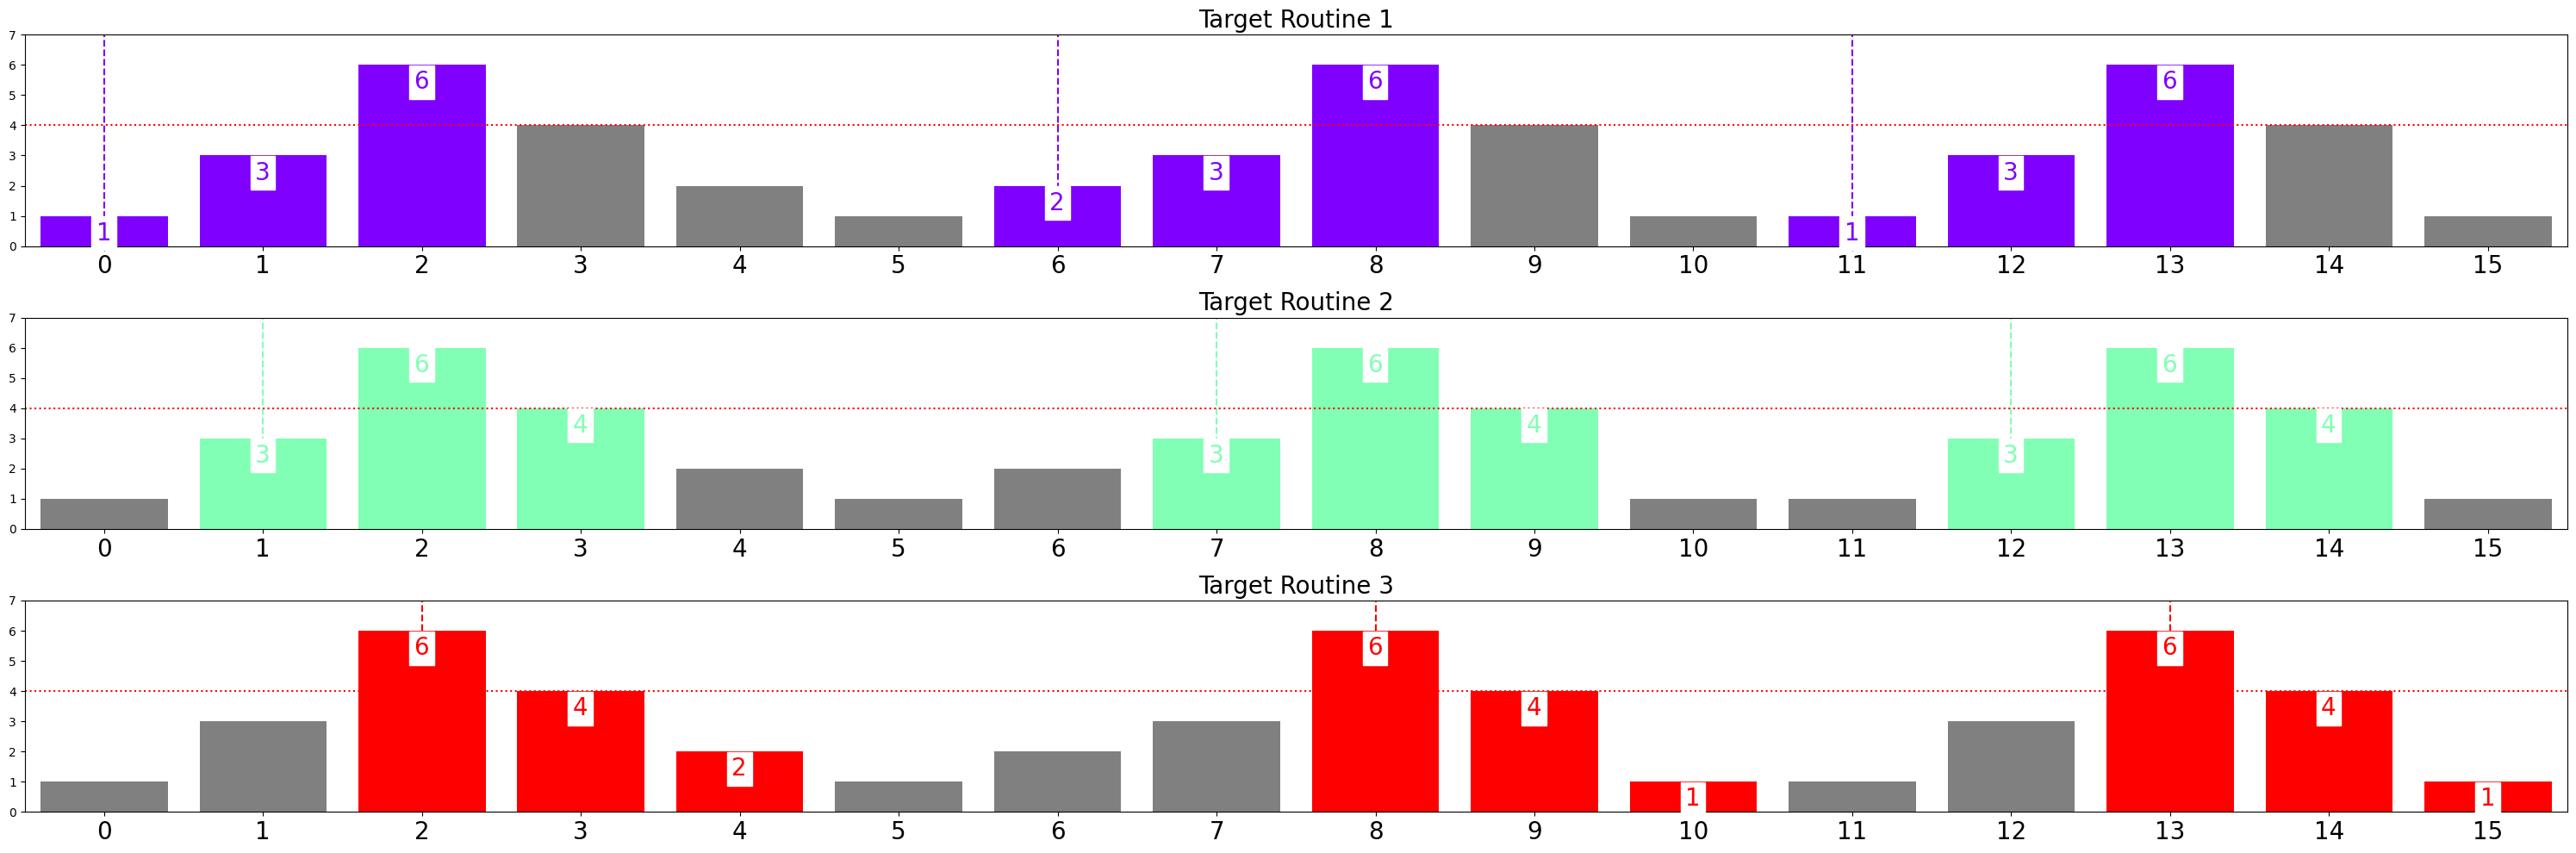

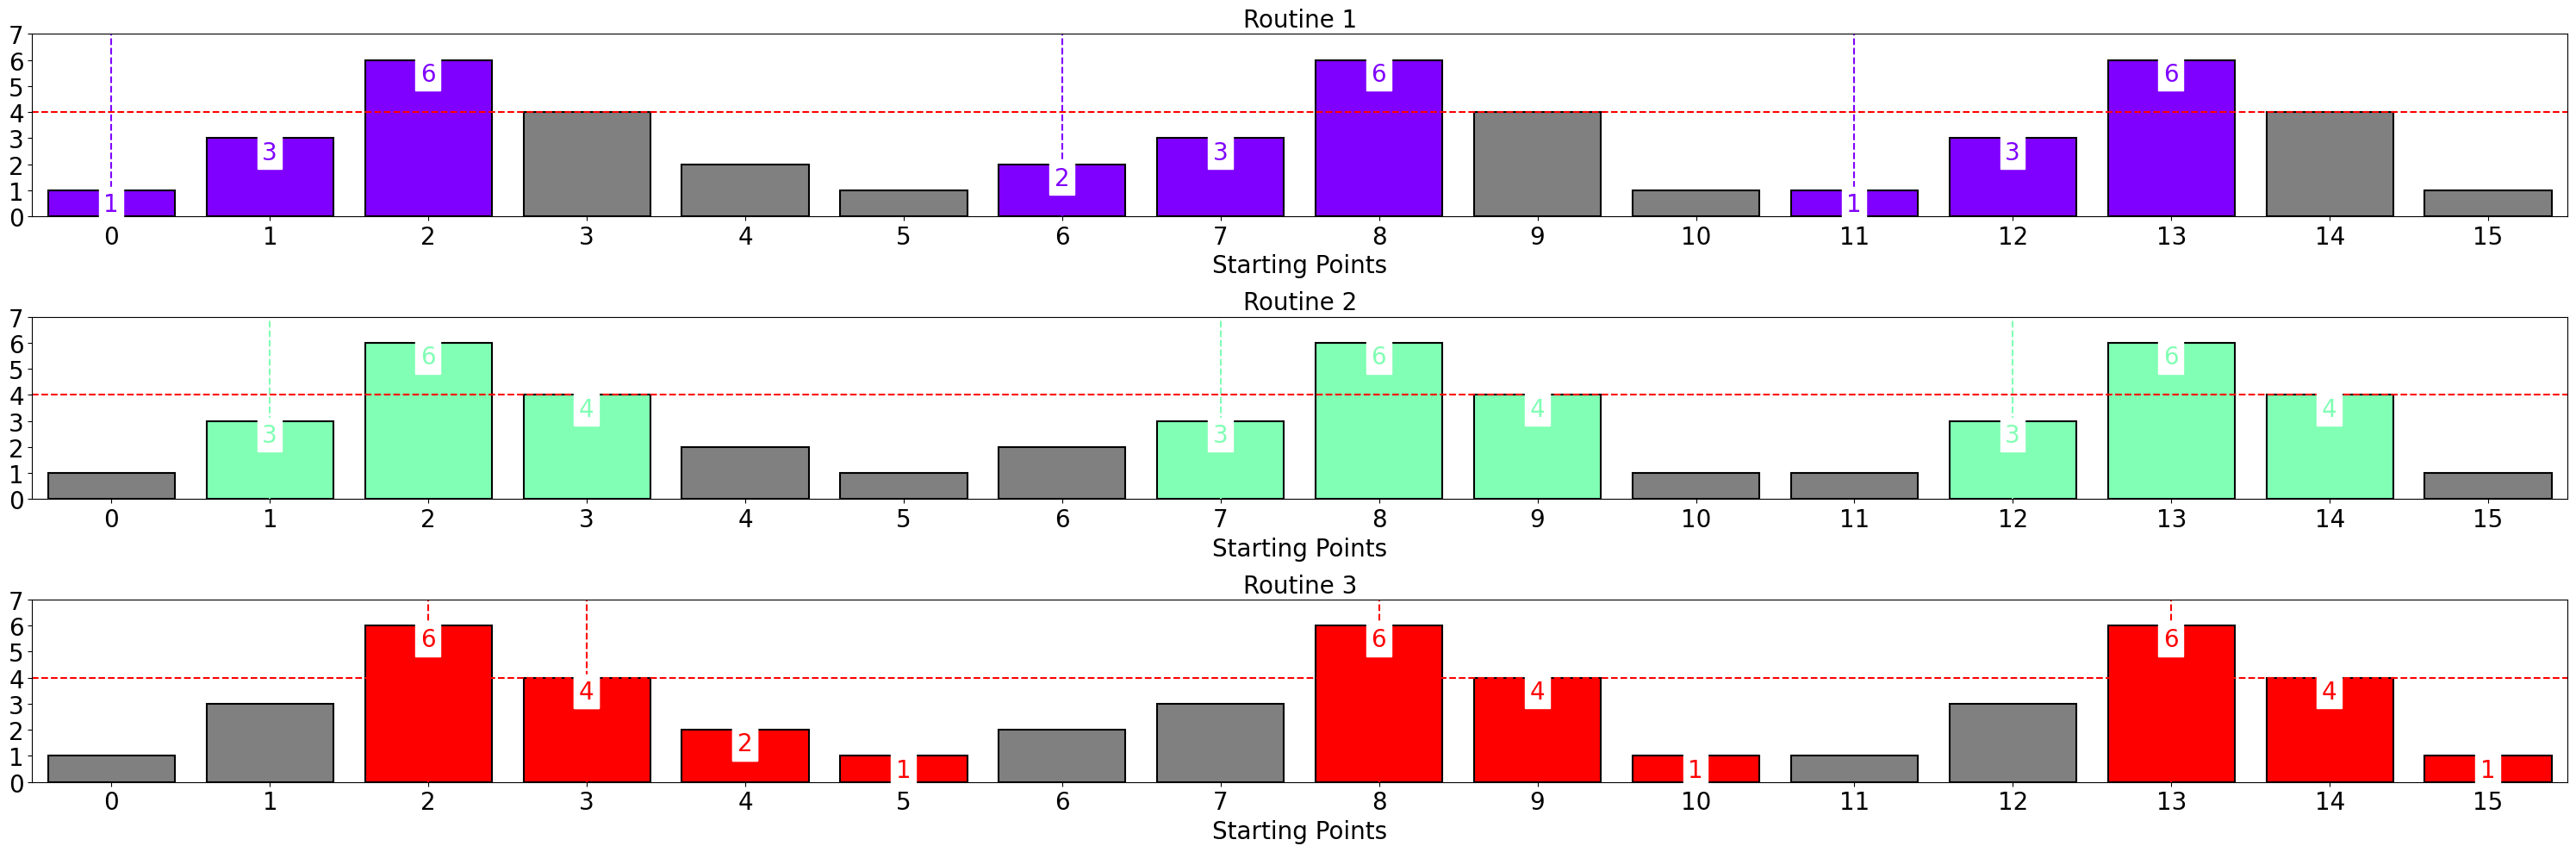

In [10]:
plot_groundtruth(time_series, target_start_points, 3, 4)
routines.plot_results()

Sin overlapping, epsilon = 1, se detectan todas las rutinas a la perfección. Veamos ahora con epsilon = 0.5

In [18]:
# ----------------WITHOUT OVERLAPPING EPSILON=0.5--------------------
routines = DRFL(m=3, G=4, R=2, C=3, epsilon=0.5)
routines.fit(time_series)
routines.show_results()

Routines detected:  1
__________________________________________________
Centroid 1: [5.5  3.5  1.25]
Routine 1: [array([6, 4, 2], dtype=int64), array([4, 2, 1], dtype=int64), array([6, 4, 1], dtype=int64), array([6, 4, 1], dtype=int64)]
Date 1: [Timestamp('2024-01-03 00:00:00', freq='D'), Timestamp('2024-01-04 00:00:00', freq='D'), Timestamp('2024-01-09 00:00:00', freq='D'), Timestamp('2024-01-14 00:00:00', freq='D')]
Starting Points 1:  [2, 3, 8, 13]

 -------------------------------------------------- 


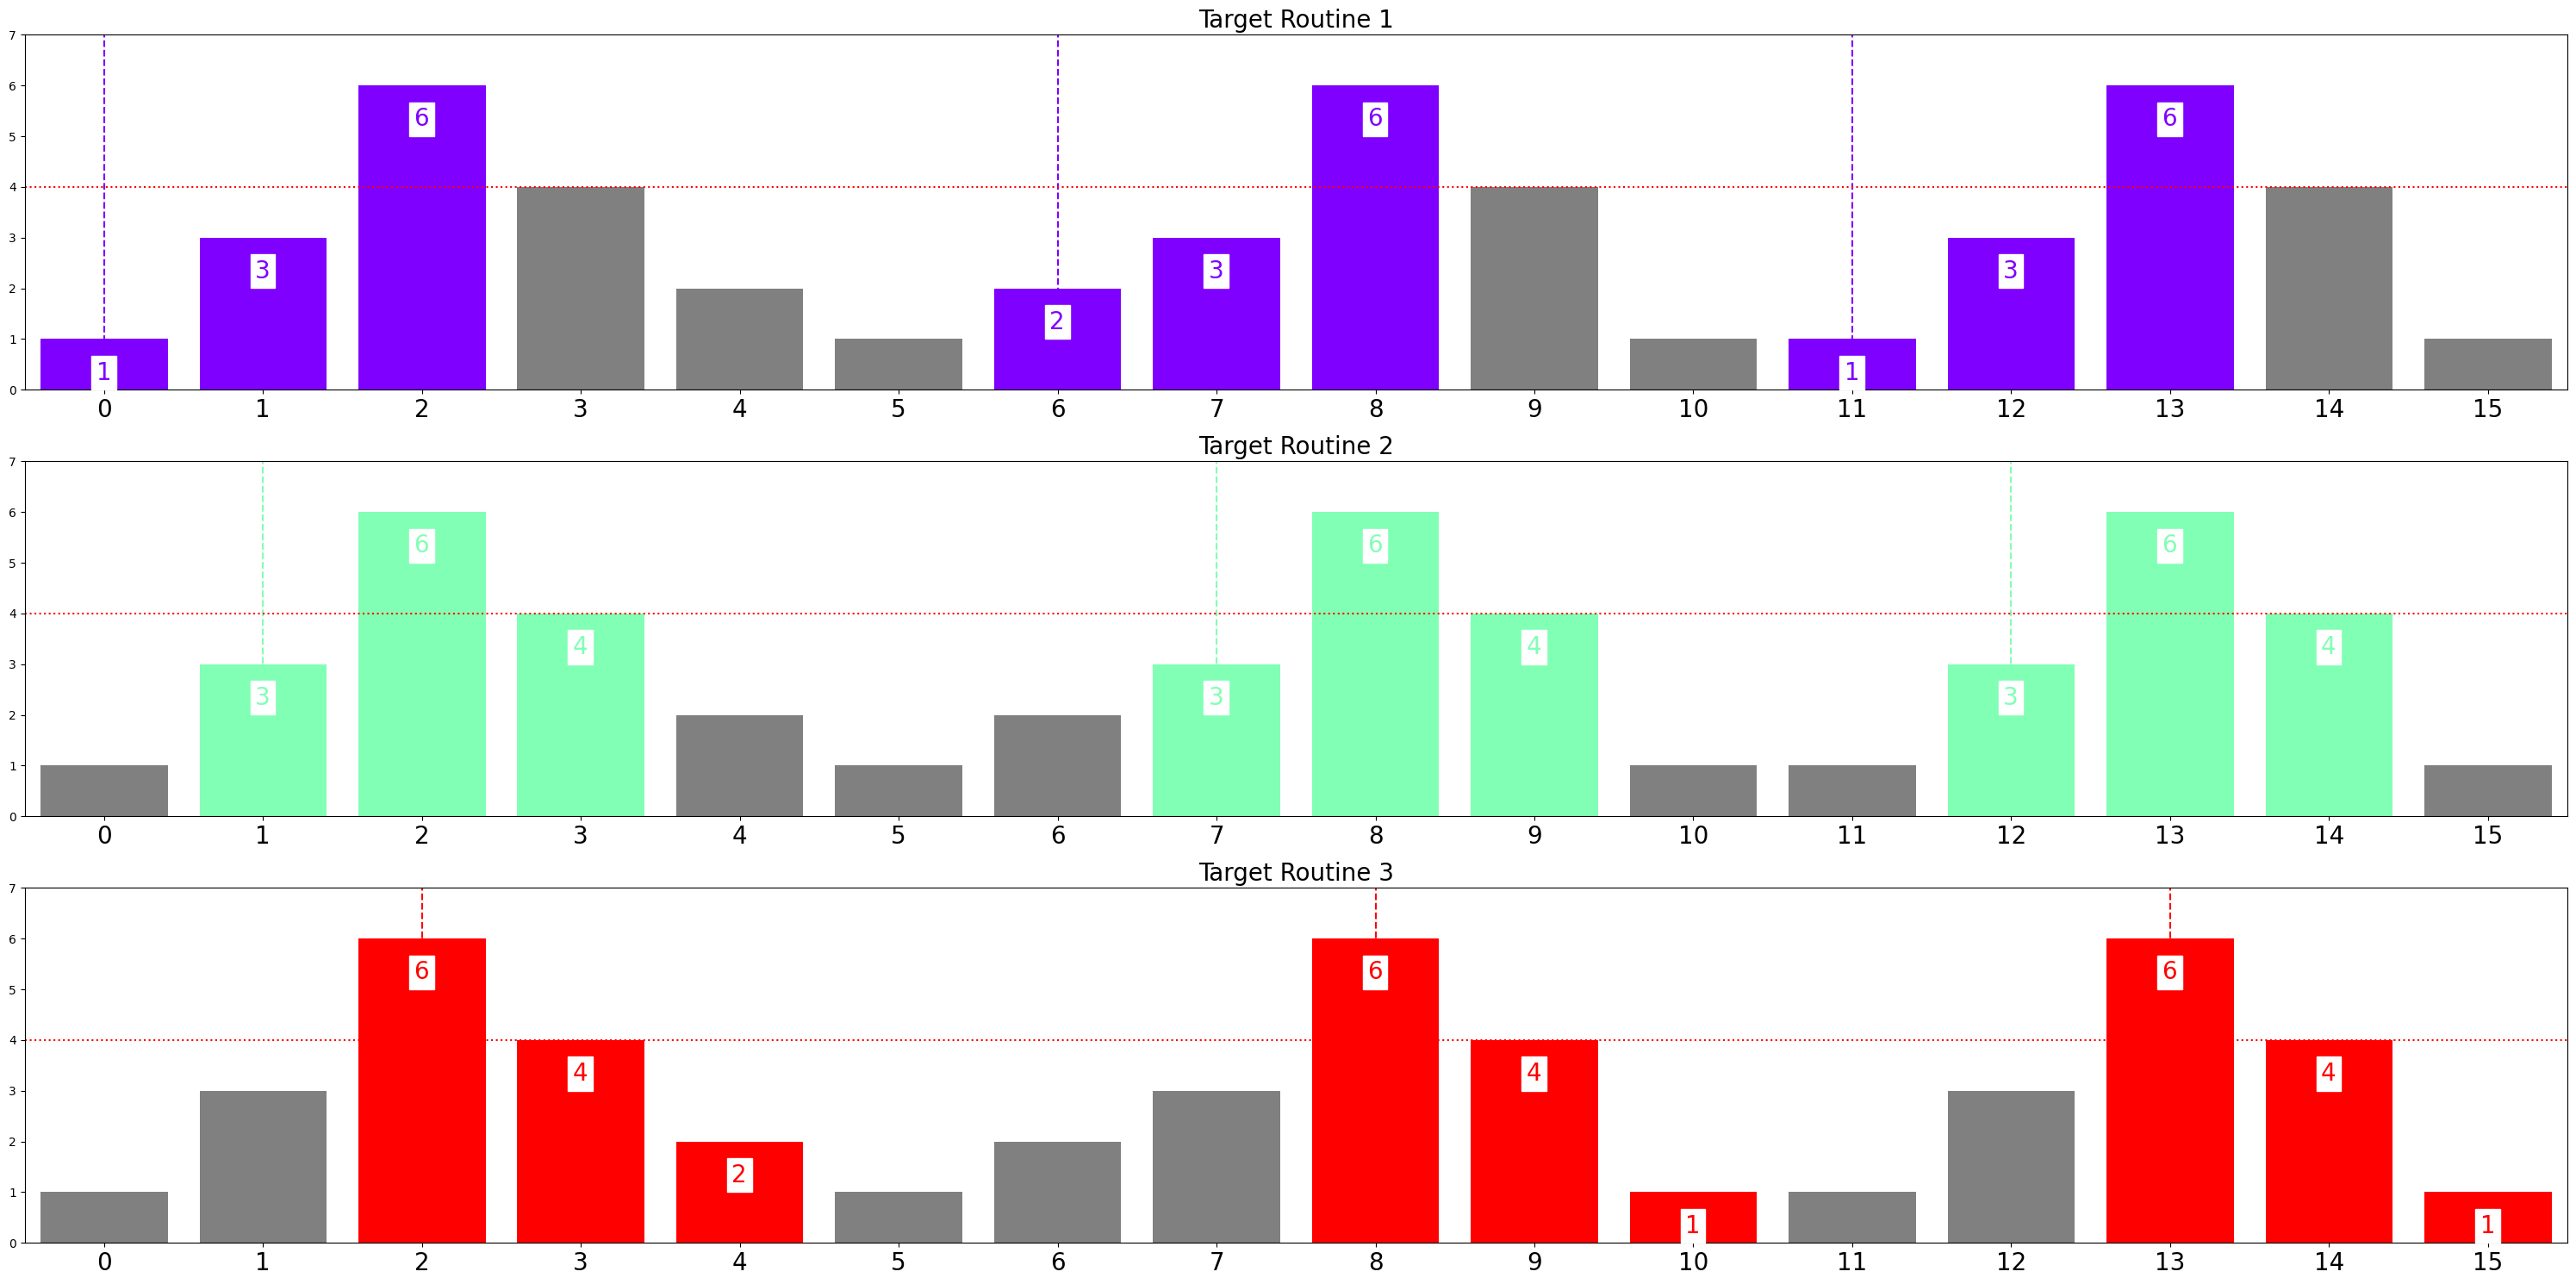

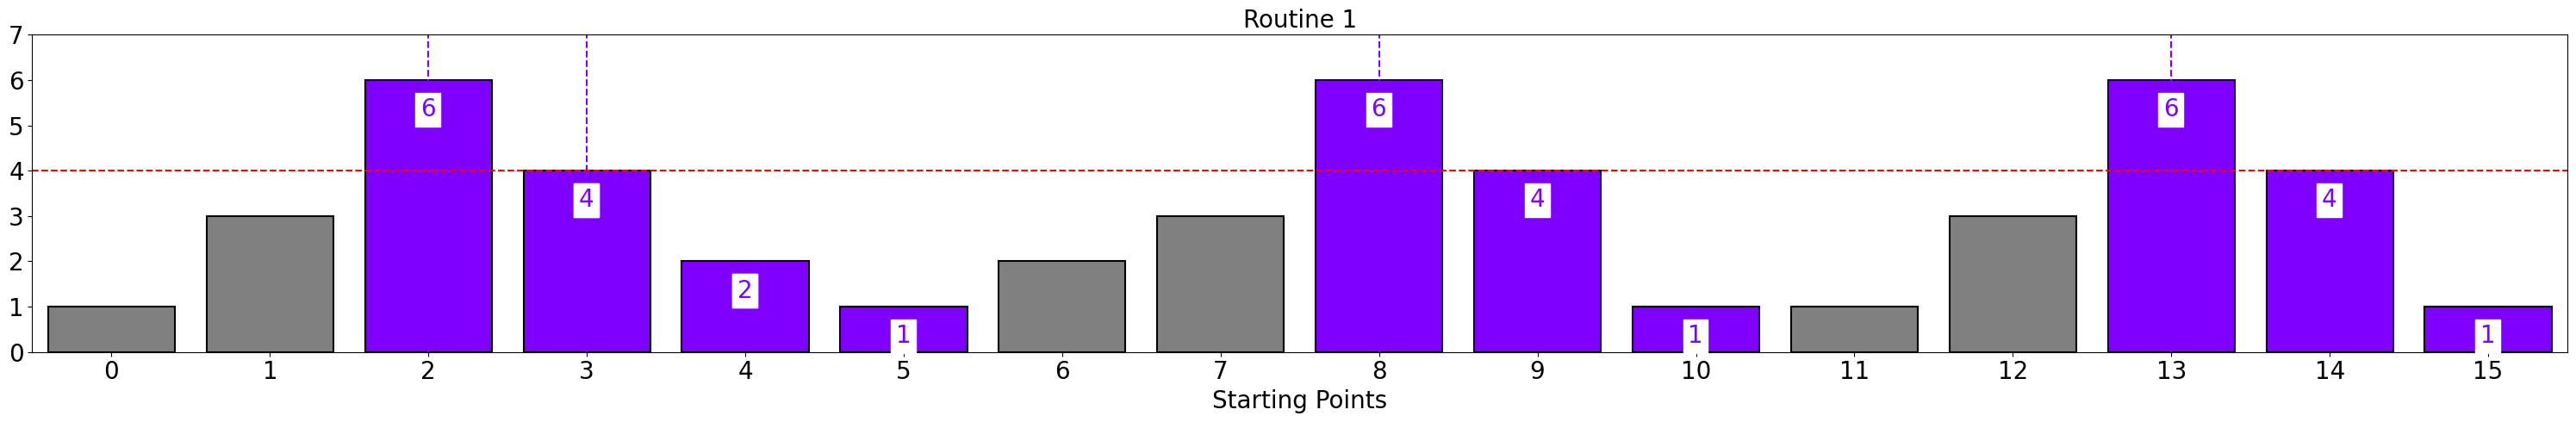

In [30]:
plot_groundtruth(time_series, target_start_points, 3, 4, figsize=(30, 15))
routines.plot_results(figsize=(30, 5), title_fontsize=20, xticks_fontsize=20)

Vemos que solamente detecta una rutina similar a la rutina target 3, con la diferencia que detecta una rutina extra [4,2,1] en starting point 3

# Case 2 time series

In [72]:
target_routine_1 = [2, 5, 6, 3]
target_routine_2 = [5, 1, 3, 4]
starting_points_1 = [0,1,3,7,15,16,22,23,30]
starting_points_2 = [2,4,5,8,10,12,17,18,25]
target_start_points = [starting_points_1, starting_points_2]

time_series = []

for x in range(31):
    if x in starting_points_1:
        time_series += target_routine_1
        
    elif x in starting_points_2:
        time_series += target_routine_2
        
    else:
        time_series += [random.randint(1, 10) for _ in range(4)]
          
time_series = pd.Series(time_series)
time_series.index = pd.date_range(start="2024-01-01", periods=len(time_series))

In [59]:
print(len(time_series))

124


In [73]:
# target_routine_1 = [2, 5, 6, 3]
# target_routine_2 = [5, 1, 3, 4]
starting_points_1 = [0,1,3,7,15,16,22,23,30]
starting_points_2 = [2,4,5,8,10,12,17,18,25]
real_starting_point_1 = [x*4 for x in starting_points_1]
real_starting_point_2 = [x*4 for x in starting_points_2]
target_start_points = [real_starting_point_1, real_starting_point_2]

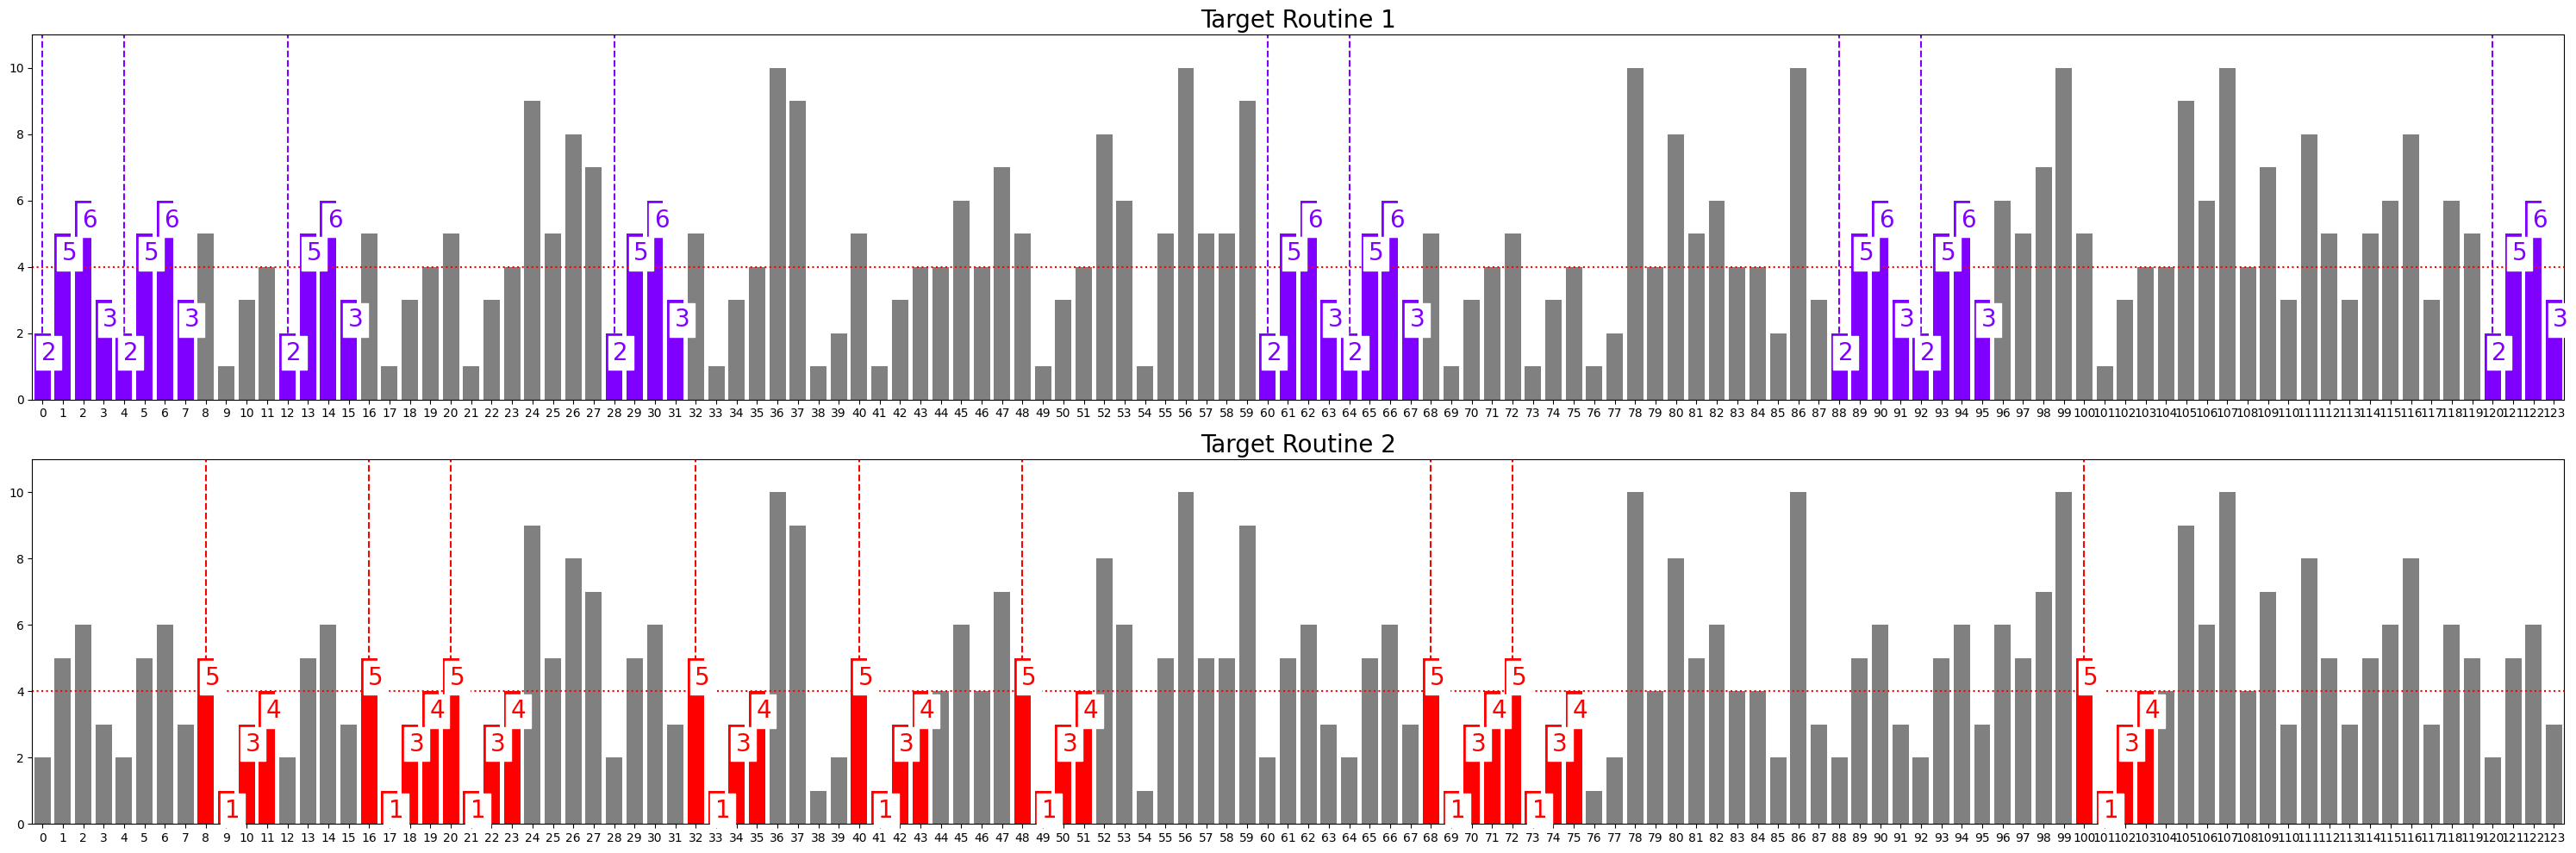

In [74]:
plot_groundtruth(time_series, target_start_points, m=4, G=4, xticks_fontsize=10)

In [91]:
# ----------------WITH OVERLAPPING EPSILON=1--------------------
routines = DRFL(m=4, G=4, R=1, C=3, epsilon=0.5)
routines.fit(time_series)
routines.show_results()

Routines detected:  2
__________________________________________________
Centroid 1: [2.1 5.1 5.9 2.9]
Routine 1: [array([2, 5, 6, 3], dtype=int64), array([2, 5, 6, 3], dtype=int64), array([2, 5, 6, 3], dtype=int64), array([2, 5, 6, 3], dtype=int64), array([2, 5, 6, 3], dtype=int64), array([2, 5, 6, 3], dtype=int64), array([2, 5, 6, 3], dtype=int64), array([2, 5, 6, 3], dtype=int64), array([3, 6, 5, 2], dtype=int64), array([2, 5, 6, 3], dtype=int64)]
Date 1: [Timestamp('2024-01-01 00:00:00', freq='D'), Timestamp('2024-01-05 00:00:00', freq='D'), Timestamp('2024-01-13 00:00:00', freq='D'), Timestamp('2024-01-29 00:00:00', freq='D'), Timestamp('2024-03-01 00:00:00', freq='D'), Timestamp('2024-03-05 00:00:00', freq='D'), Timestamp('2024-03-29 00:00:00', freq='D'), Timestamp('2024-04-02 00:00:00', freq='D'), Timestamp('2024-04-27 00:00:00', freq='D'), Timestamp('2024-04-30 00:00:00', freq='D')]
Starting Points 1:  [0, 4, 12, 28, 60, 64, 88, 92, 117, 120]

 ---------------------------------

In [87]:
from src.structures import Cluster
from typing import Union
rutinas = routines.get_results()
def get_closest_target_routines(routines: DRFL, target_centroids: Union[list[list], list[np.ndarray]]) -> list[Cluster]:
    list_clusters = routines.get_results().get_routines()
    closest_routines: list[Cluster] = []
    best_distances = []
    for target in target_centroids:
        distances = [np.max(np.abs(np.array(target)-cluster.centroid)) for cluster in list_clusters]
        closest_routines.append(list_clusters[np.argmin(distances)])
        best_distances.append(np.min(distances))
        
    
            
        
    return closest_routines, best_distances


[close_cluster1, close_cluster2], best_distances = get_closest_target_routines(routines, [target_routine_1, target_routine_2])
print(best_distances)

[0.3571428571428572, 0.5]


In [89]:
target_routine_1

[2, 5, 6, 3]

In [88]:
close_cluster1, close_cluster2

(Cluster(
 	 -Centroid: [2.28571429 4.71428571 5.64285714 2.64285714] 
 	 -Instances: [array([2, 5, 6, 3], dtype=int64), array([2, 5, 6, 3], dtype=int64), array([1, 3, 4, 2], dtype=int64), array([2, 5, 6, 3], dtype=int64), array([3, 4, 5, 1], dtype=int64), array([2, 5, 6, 3], dtype=int64), array([4, 4, 6, 4], dtype=int64), array([2, 5, 6, 3], dtype=int64), array([2, 5, 6, 3], dtype=int64), array([3, 4, 5, 1], dtype=int64), array([2, 5, 6, 3], dtype=int64), array([2, 5, 6, 3], dtype=int64), array([3, 6, 5, 2], dtype=int64), array([2, 5, 6, 3], dtype=int64)]
 	 -Dates: [Timestamp('2024-01-01 00:00:00', freq='D'), Timestamp('2024-01-05 00:00:00', freq='D'), Timestamp('2024-01-10 00:00:00', freq='D'), Timestamp('2024-01-13 00:00:00', freq='D'), Timestamp('2024-01-19 00:00:00', freq='D'), Timestamp('2024-01-29 00:00:00', freq='D'), Timestamp('2024-02-13 00:00:00', freq='D'), Timestamp('2024-03-01 00:00:00', freq='D'), Timestamp('2024-03-05 00:00:00', freq='D'), Timestamp('2024-03-11 00:00:0